# ピアソンの積率相関係数と，スピアマンの順位相関係数との関係を調べる(2022/1/13)
---

## 概要
---
本notebookでは，量の相関関係を表す代表的な2指標「ピアソンの積率相関係数」と「スピアマンの順位相関係数」について，それぞれの性質を比較する．

2変数の値について，片方の変数が変化した際に，もう片方の変数の値が推移する傾向を示すという点で，どちらの相関係数も共通点がある．ただ，ピアソンの積率相関係数は強い相関に線形性を求めるのに対して，スピアマンの順位相関係数は強い相関に線形性を要求しないという差異がある．

言い換えると，スピアマンの順位相関係数の方が「ゆるい」相関を示すということである．直線状にデータ点が並んでいなくとも，単調増加が見られれば強い相関とみなす．

## ピアソンの積率相関係数
---
ピアソンの積率相関係数は一般的に「相関係数」と呼ばれる代表的な指標である．2変数についての相関，すなわち片方の値が増加したときに，もう片方の値も増加・減少するかどうかを定量的に表す．$n$個のデータ点$D = \{(x_1,y_1), (x_2,y_2),...,(x_n,y_n)\}$があるとき，定義は以下のようになる：

\begin{eqnarray}
r &=& \frac{s_{xy}}{s_xs_y} \\
&=& \frac{\sum_{i=1}^{n}(x - \bar{x})(y - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y - \bar{y})^2}}
\end{eqnarray}

$s_{xy}$は標本共分散であり，$s_x$と$s_y$はそれぞれ標本標準偏差である．また，$\bar{x}$と$\bar{y}$はそれぞれ標本平均である．

ピアソンの積率相関係数は$-1\leq r \leq 1\$の値を取る．1あるいは-1に近い場合は「強い相関」があるとし，0に近い場合は「相関なし」と判断する．順序尺度なので，ピアソンの積率相関係数を比較する際は，「どちらの方が相関が強いか」という観点でしか比較ができない点に注意する．「0.3だけ相関が強い」や「2倍の相関がある」といった表現はできない．

$r=1$のとき，$D$のデータ点は全て$y=x$上にある．また，$r=-1$のとき，$D$のデータ点は全て$y=-x$上にある．つまり，ピアソンの積率相関係数は強い相関の条件に線形性を求めている．

## スピアマンの順位相関係数
---
スピアマンの順位相関係数は，ピアソンの積率相関係数の特殊な場合だととらえることができる．具体的には，$n$個のデータ点$D = \{(x_1,y_1), (x_2,y_2),...,(x_n,y_n)\}$について，変数$x$と$y$の大小関係をそれぞれ比較し，順位付けを行う．そして，それぞれの変数の順位を用いてピアソンの積率相関係数を計算したものがスピアマンの順位相関係数である．

例えば以下のようなデータ点があったとする：

|  | $x$ | $y$ |
| :---: | :---: |:---: |
| 1 | 3.2 | 7.1 |
| 2 | 6.1 | 0.2 |
| 3 | 7.8 | 4.7 |
| 4 | 1.1 | 7.9 |
| 5 | 3.6 | 3.6 |
| 6 | 5.8 | 5.8 |

これを以下のように順位付けする．順序尺度への変換である：

|  | $x$ | $y$ |
| :---: | :---: |:---: |
| 1 | 2.0 | 5.0 |
| 2 | 5.0 | 1.0 |
| 3 | 6.0 | 3.0 |
| 4 | 1.0 | 6.0 |
| 5 | 3.0 | 2.0 |
| 6 | 4.0 | 4.0 |

そして，変換後の変数の値を用いて，先述のピアソンの積率相関係数を計算すれば，スピアマンの順位相関係数となる．

また，スピアマンの順位相関係数の算出には，以下の公式を用いることもできる：

\begin{eqnarray}
r_s = 1 - \frac{6\displaystyle \sum_{i = 1}^n {d_i}^2}{n(n^2 - 1)}
\end{eqnarray}

ここで$d_i$は，各データ点における変数の値の差である．つまり$d_i = x_i - y_i$によって求められる．

スピアマンの順位相関係数も$-1 \leq r_s \leq 1$の範囲の値を取り，-1や1に近いほど強い相関，0に近いほど相関がないとみなす．

## それぞれの相関係数の違いと注意点
---
定義からもわかるように，スピアマンの順位相関係数は変数間の順序関係のみを考慮するため，データ点の線形性を要求しない．言い換えると，データ点は特段$y=x$上や$y=-x$上になくとも良いということである．単調増加・単調減少を示せば，相関も1あるいは-1を示す．

この差異については，後ほどPythonを用いたシミュレーションでも実際に検討する．

また，いずれの相関係数もデータの相関をみるという点で共通しているが，別の観点でみると2変数間の増加傾向・減少傾向しかとらえることができないという点も共通している．2変数を座標としてデータをプロットしてみると，ほかにも様々なデータの構造が見られる．例えば$y=x^2$上にばらつくようなデータがあった場合，上記の相関係数は正しくデータの構造をとらえることができない(相関係数からでは，データ点が$y=x^2$上にばらついていることを判断できない)．

## Pythonを用いたシミュレーション
---
### $y=x$上のデータ点を用いた場合

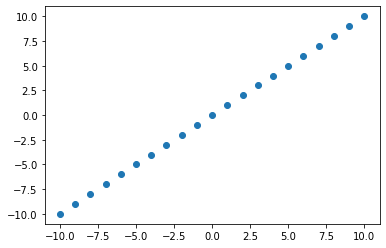

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# データセットを作る
x = np.arange(-10, 11)
y = x

plt.scatter(x,y)

In [2]:
# ピアソンの積率相関係数を計算
print('Pearson:', np.corrcoef(x,y))

# 順序尺度に変換しても値は変わらないため，
# 同じ関数でスピアマンの順位相関係数も計算
print('Spearman:', np.corrcoef(x,y))

Pearson: [[1. 1.]
 [1. 1.]]
Spearman: [[1. 1.]
 [1. 1.]]


### $y=x^3$上のデータ点を用いた場合

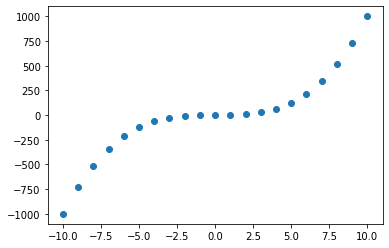

In [3]:
# データセットを作る
x = np.arange(-10, 11)
y = x**3

plt.scatter(x,y)

In [4]:
# ピアソンの積率相関係数を計算
print('Pearson:', np.corrcoef(x,y))


# スピアマンの順位相関係数の計算
import pandas as pd

# pandasのrank関数を用いて，変数yを順序尺度に変換する
y = pd.Series(y).rank().values

print('Spearman:', np.corrcoef(x,y))

Pearson: [[1.         0.91790695]
 [0.91790695 1.        ]]
Spearman: [[1. 1.]
 [1. 1.]]


### (番外編)$y = x^2$上のデータ点を用いた場合

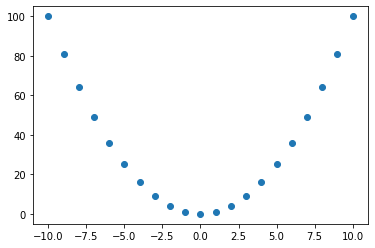

In [5]:
# データセットを作る
x = np.arange(-10, 11)
y = x**2

plt.scatter(x,y)

In [6]:
# ピアソンの積率相関係数を計算
print('Pearson:', np.corrcoef(x,y))


# スピアマンの順位相関係数の計算
y = pd.Series(y).rank().values
print('Spearman:', np.corrcoef(x,y))

Pearson: [[ 1.00000000e+00 -3.07735001e-17]
 [-3.07735001e-17  1.00000000e+00]]
Spearman: [[1. 0.]
 [0. 1.]]


## 参考文献
---
[相関係数, Wikipedia](https://ja.wikipedia.org/wiki/%E7%9B%B8%E9%96%A2%E4%BF%82%E6%95%B0)

[スピアマンの順位相関係数，STATISTICS](http://www.tamagaki.com/math/Statistics609.html)

[スピアマンの順位相関係数，Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%B9%E3%83%94%E3%82%A2%E3%83%9E%E3%83%B3%E3%81%AE%E9%A0%86%E4%BD%8D%E7%9B%B8%E9%96%A2%E4%BF%82%E6%95%B0)

[ピアソンの相関の方法とスピアマンの相関の方法の比較，Minitab](https://support.minitab.com/ja-jp/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/)

[numpy.corrcoef，Numpy v1.22 Manual](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)

[pandas.DataFrame, Seriesを順位付けするrank，note.nkmk.me](https://note.nkmk.me/python-pandas-rank/)

[pandas.DataFrame, SeriesとNumPy配列ndarrayを相互に変換，note.nkmk.me](https://note.nkmk.me/python-pandas-numpy-conversion/)